# <center> PROCESAMIENTO DIGITAL DE SEÑALES DE AUDIO</center>
## <center> Transformada Q Constante</center>      

In [55]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from scipy.io import wavfile

import IPython.display as ipd

**NOTA:** *Las siguientes celdas instalan e importan la biblioteca [librosa](https://librosa.org/) para procesamiento de audio y música en python.*

In [56]:
!pip install librosa


[notice] A new release of pip available: 22.2.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [57]:
import librosa
import librosa.display

In [58]:
librosa.__version__

'0.10.2.post1'

### Descripción

Este ejercicio busca mostrar el Cepstrum complejo de una señal a lo largo del tiempo. 


### Cómo correr el notebook
Se puede bajar y correr el notebook de forma local en una computadora.

O también se puede correr en Google Colab usando el siguiente enlace. 

<table align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/mrocamora/audio-dsp/blob/main/notebooks/audioDSP-CQT_example.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

### Obtener un archivo

La siguiente celda descarga un archivo de audio de ejemplo.

In [111]:
# read the audio file
y, sr = librosa.load(librosa.ex('trumpet'))


# read the audio file
filename = './audio/LP-mem-6-a.wav'
y, sr = librosa.load(filename)

# play audio
ipd.Audio(y, rate=sr)

La siguiente celda grafica la forma de onda.

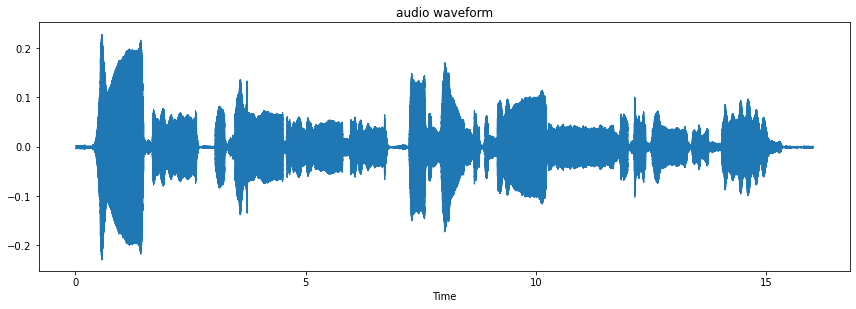

In [112]:
# plot audio signal
plt.figure(figsize=(12,8))
ax1 = plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr)
plt.title('audio waveform')
plt.tight_layout()

### Implementación del Cepstrum complejo

Analice la implementación:

  1. ¿A qué corresponde ndelay? 

In [124]:
import numpy as np


def complex_cepstrum(x, n=None):
    r"""Compute the complex cepstrum of a real sequence.

    Parameters
    ----------
    x : ndarray
        Real sequence to compute complex cepstrum 
    n : {None, int}, optional
        Length of the Fourier transform.

    Returns
    -------
    ceps : ndarray
        The complex cepstrum of the real data sequence `x` computed using the
        Fourier transform.
    """
    def _unwrap(phase):
        samples = phase.shape[-1]
        unwrapped = np.unwrap(phase)
        center = (samples + 1) // 2
        if samples == 1:
            center = 0
        ndelay = np.array(np.round(unwrapped[..., center] / np.pi))
        unwrapped -= np.pi * ndelay[..., None] * np.arange(samples) / center
        return unwrapped, ndelay

    eps = 0.000000001
    spectrum = np.fft.fft(x, n=n)
    unwrapped_phase, ndelay = _unwrap(np.angle(spectrum))
    log_spectrum = np.log(np.abs(spectrum)+eps) + 1j * unwrapped_phase
    ceps = np.fft.ifft(log_spectrum).real

    return ceps, ndelay

(512, 1377)


<Figure size 432x288 with 0 Axes>

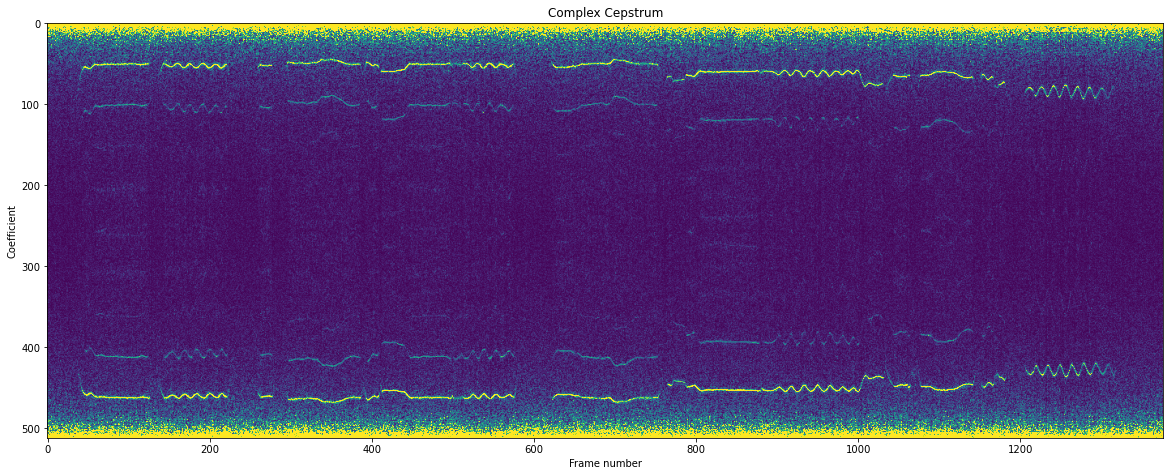

In [128]:
from scipy import signal
# length of the input signal
M = y.size;

# length of the analysis window in samples
L = 512

# hop size in samples.
R = int(L/2)

# total number of analysis frames
num_frames = int(np.floor((M-L)/R))

# analysis window
window = signal.windows.get_window('hann', L)

# overlap-add (OLA) of the analysis windows
olawin = np.zeros((num_frames-1)*R+L)


ceps = np.zeros((L,num_frames))
print(np.shape(ceps))
# for each analysis frame

for ind in range(num_frames):

    # initial index of current window
    n_ini = ind * R
    cc= complex_cepstrum(np.fft.fftshift(y[n_ini:n_ini+L]*window))
    ceps[:,ind]= cc[0]

    
    
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize = (20,10))
img = np.abs(ceps)
plt.imshow(img,vmin=0, vmax=0.5)
plt.ylabel('Coefficient')
plt.xlabel('Frame number')
plt.title('Complex Cepstrum')
plt.show()
